In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import math as m
df=pd.read_csv(r'C:\Users\Namrata Dey\Desktop\PYTHON\forestfires.csv')
#df.head(10)


list1=[0 for i in range(517)]
count=0
for index,rows in df.iterrows():
    if rows["area"]==0:
        list1[index]=0
    else:
        list1[index]=1
area_b=pd.DataFrame(list1)
df=pd.concat([df,area_b],axis=1)
df.rename({0:"area_b"},axis=1,inplace=True)
df.drop(["area"],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
le_Gender=LabelEncoder()
#adding the le_gender column to the input var df(x)
df["month_b"]=le_Gender.fit_transform(df["month"])
df["day_b"]=le_Gender.fit_transform(df["day"])
df.drop(["month","day"],axis=1,inplace=True)

In [2]:
#sns.heatmap(df.corr(),annot=True)

In [3]:
#plt.boxplot(df["Y"])

In [4]:
#removing outleirs of Y
count=0
for index,row in df.iterrows():
    if (row["Y"]>6) or (row["Y"]<3) :
        df=df.drop(index)
        count+=1
print(df["Y"].count())
#plt.boxplot(df["Y"])
#df.info()
print(count)

466
51


In [5]:
#plt.boxplot(df["X"])

In [6]:
#plt.boxplot(df["FFMC"])

In [7]:
#removing outleirs of FFMC
count=0
for index,row in df.iterrows():
    if (row["FFMC"]>96) or (row["FFMC"]<88) :
        df=df.drop(index)
        count+=1
print(df["FFMC"].count())
#plt.boxplot(df["FFMC"])
#df.info()
print(count)

393
73


In [8]:
#plt.boxplot(df["DMC"])

In [9]:
#removing outleirs of DMC
count=0
for index,row in df.iterrows():
    if (row["DMC"]>215) or (row["DMC"]<5) :
        df=df.drop(index)
        count+=1
print(df["DMC"].count())
#plt.boxplot(df["DMC"])
#df.info()
print(count)

355
38


In [10]:
#plt.boxplot(df["DC"])

In [11]:
#removing outleirs of DC
count=0
for index,row in df.iterrows():
    if (row["DC"]>800) or (row["DC"]<450) :
        df=df.drop(index)
        count+=1
print(df["DC"].count())
#plt.boxplot(df["DC"])
#df.info()
print(count)

275
80


In [12]:
#plt.boxplot(df["ISI"])

In [13]:
#removing outleirs of ISI
count=0
for index,row in df.iterrows():
    if (row["ISI"]>15.5) or (row["ISI"]<0) :
        df=df.drop(index)
        count+=1
print(df["ISI"].count())
#plt.boxplot(df["ISI"])
#df.info()
print(count)

247
28


In [14]:
#plt.boxplot(df["temp"])

In [15]:
#removing outleirs of temp
count=0
for index,row in df.iterrows():
    if (row["temp"]>30) or (row["temp"]<12) :
        df=df.drop(index)
        count+=1
print(df["temp"].count())
#plt.boxplot(df["temp"])
#df.info()
print(count)

230
17


{'whiskers': [<matplotlib.lines.Line2D at 0x48627646d8>,
 'caps': [<matplotlib.lines.Line2D at 0x4862764d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x48627642e8>],
 'medians': [<matplotlib.lines.Line2D at 0x486277d438>],
 'fliers': [<matplotlib.lines.Line2D at 0x486277d780>],
 'means': []}

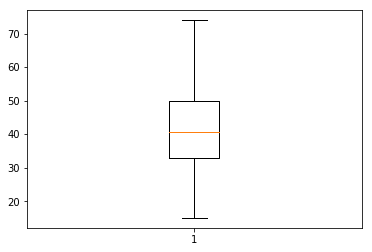

In [16]:
plt.boxplot(df["RH"])

In [17]:
#plt.boxplot(df["wind"])

In [18]:
#plt.boxplot(df["rain"])

In [19]:
#after seeing so many outliers in rain, dropping rain
df.drop(["rain"],axis=1,inplace=True)

In [20]:
#df.head()

In [21]:
#plt.boxplot(df["month_b"])

In [22]:
#plt.boxplot(df["day_b"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 515
Data columns (total 12 columns):
X          230 non-null int64
Y          230 non-null int64
FFMC       230 non-null float64
DMC        230 non-null float64
DC         230 non-null float64
ISI        230 non-null float64
temp       230 non-null float64
RH         230 non-null int64
wind       230 non-null float64
area_b     230 non-null int64
month_b    230 non-null int32
day_b      230 non-null int32
dtypes: float64(6), int32(2), int64(4)
memory usage: 21.6 KB


In [24]:
#sns.countplot(x="area_b",data=df)

In [25]:
#sns.heatmap(df.corr(),annot=True)
#after removing outliers from all columns, the corr of FFMC and day_b decrease wrt area_b and rest is increasing.

In [26]:
# normalization
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area_b,month_b,day_b
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0,10,5
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0,10,2
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0,1,3
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0,1,1
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0,11,5


In [27]:
for column in ["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","month_b","day_b"]:
    min_=float(df[column].min())
    max_=float(df[column].max())
    for index,row in df.iterrows():
        df[column]=df[column].replace(row[column],(row[column]-min_)/(max_-min_))


In [28]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area_b,month_b,day_b
1,0.750,0.333333,0.320513,0.000000,0.634309,0.184466,0.325581,0.305085,0.058824,0,0.9,0.833333
2,0.750,0.333333,0.320513,0.048368,0.685888,0.184466,0.127907,0.305085,0.105882,0,0.9,0.333333
5,0.875,1.000000,0.538462,0.290793,0.109533,0.961165,0.569767,0.237288,0.588235,0,0.0,0.500000
6,0.875,1.000000,0.538462,0.311772,0.131556,0.359223,0.680233,0.203390,0.317647,0,0.0,0.166667
8,0.875,1.000000,0.371795,0.548368,0.702405,0.213592,0.040698,0.813559,0.588235,0,0.0,0.833333


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df.drop(["area_b","month_b"],axis=1) #month_b has so many zeroes after normalization, hence dropping it from x
y=df["area_b"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

y_pred=logmodel.predict(x_test)

C:\Users\Namrata Dey\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6376811594202898

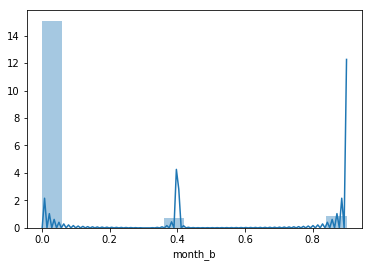

In [31]:
sns.distplot(df["month_b"])

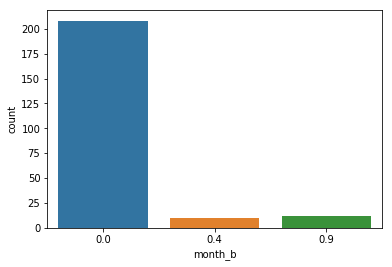

In [32]:
sns.countplot(x="month_b",data=df)

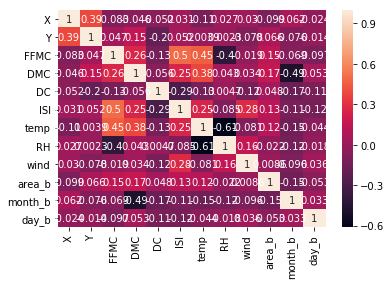

In [33]:
sns.heatmap(df.corr(),annot=True)
#after normalizing all columns, the corr of X and day_b increases wrt area_b, 
# corr of month_b doubles wrt area_b but sign becomes -ve ,
# and rest shows no change.
#1.5% accuracy increased using logistic regression

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures=SelectKBest(score_func=f_classif,k=5)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x)

In [35]:
dfscores
#x.head()

,0
0,2.237210
1,1.009861
2,4.920123
3,7.168572
4,0.521769
5,4.098765
6,3.082386
7,0.110887
8,0.016892
9,0.632231


In [36]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area_b,month_b,day_b
1,0.750,0.333333,0.320513,0.000000,0.634309,0.184466,0.325581,0.305085,0.058824,0,0.9,0.833333
2,0.750,0.333333,0.320513,0.048368,0.685888,0.184466,0.127907,0.305085,0.105882,0,0.9,0.333333
5,0.875,1.000000,0.538462,0.290793,0.109533,0.961165,0.569767,0.237288,0.588235,0,0.0,0.500000
6,0.875,1.000000,0.538462,0.311772,0.131556,0.359223,0.680233,0.203390,0.317647,0,0.0,0.166667
8,0.875,1.000000,0.371795,0.548368,0.702405,0.213592,0.040698,0.813559,0.588235,0,0.0,0.833333


In [54]:
from sklearn.model_selection import train_test_split
x=df.loc[ : ,["DMC","FFMC","ISI","temp","X","Y","day_b","DC","RH"]]
y=df["area_b"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
b=int(m.sqrt(len(x)))
classifier=KNeighborsClassifier(n_neighbors=b,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 5 12]
 [ 6 23]]


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6086956521739131

In [39]:
x.count()

DMC      230
FFMC     230
ISI      230
temp     230
X        230
Y        230
day_b    230
DC       230
RH       230
dtype: int64